In [1]:
import pandas as pd
import numpy as np
from plotnine import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, LeaveOneOut, ShuffleSplit, GridSearchCV

Algorithme des $k$ plus proches voisins pour la discrimination binaire
---
Importer les données simulées des fichiers `nearsep1.txt`, `nearsep2.txt` et `nonsep.txt`.

In [2]:
data = dict()
for dt in ["nearsep1", "nearsep2", "nonsep"]:
    data[dt] = pd.read_csv(f"../data/{dt}.txt", sep = ";")

Transformer la variable d’intérêt `Y` en facteur si besoin, représenter graphiquement les points de coordonnées `X1` et `X2`, en distinguant par des symboles et/ou des couleurs différents les points correspondant aux sorties égales à 1 des points correspondant aux sorties égales à -1.

D:\Programmes\Anaconda3\envs\datascience\lib\site-packages\plotnine\utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


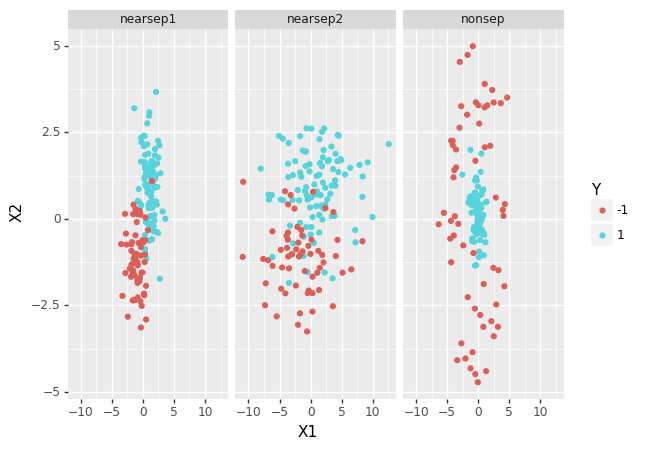

<ggplot: (-9223371915140049940)>

In [3]:
vizu = pd.DataFrame(columns = ['Y', 'X1', 'X2', 'dt'])
for dt, df in data.items():
    vizu = vizu.append(df.assign(dt = dt))

(
    ggplot(vizu) +
    aes("X1", "X2", color = "Y") +
    geom_point() + facet_grid(".~dt")
)

In [4]:
del vizu

Estimer le risque moyen de l’algorithme $k$ plus proches voisins par validation hold out pour $k$ = 1,3,96

D:\Programmes\Anaconda3\envs\datascience\lib\site-packages\plotnine\utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


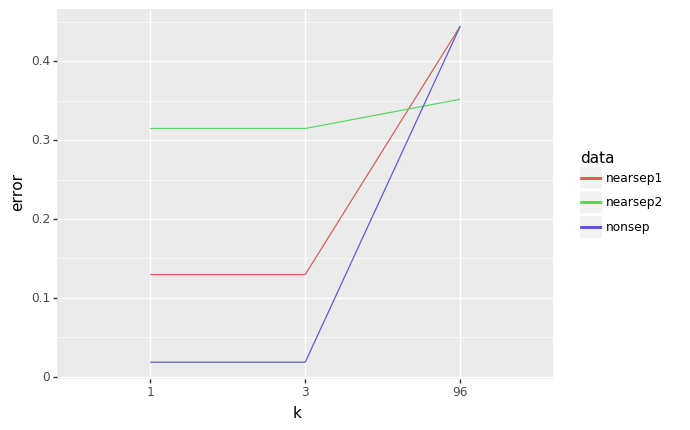

<ggplot: (-9223371915140057816)>

In [5]:
results = pd.DataFrame(columns = ['k', 'error', 'data'])
knn = GridSearchCV(
    KNeighborsClassifier(),
    param_grid = {"n_neighbors": [1, 3, 96]},
    scoring = 'accuracy',
    cv = ShuffleSplit(n_splits = 1, train_size = 2/3)
)

for dt, df in data.items():
    knn.fit(df[['X1', 'X2']], df['Y'])
    results = results.append(pd.DataFrame({
        'k': [1, 3, 96],
        'error': 1 - knn.cv_results_['mean_test_score'],
        'data': dt
    }))

(
    ggplot(results) +
    aes("k","error", color = "data", group = "data") + 
    geom_line()
)

Faire la même chose à l’aide des fonctions $k$ = 1,...,90.

D:\Programmes\Anaconda3\envs\datascience\lib\site-packages\plotnine\utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


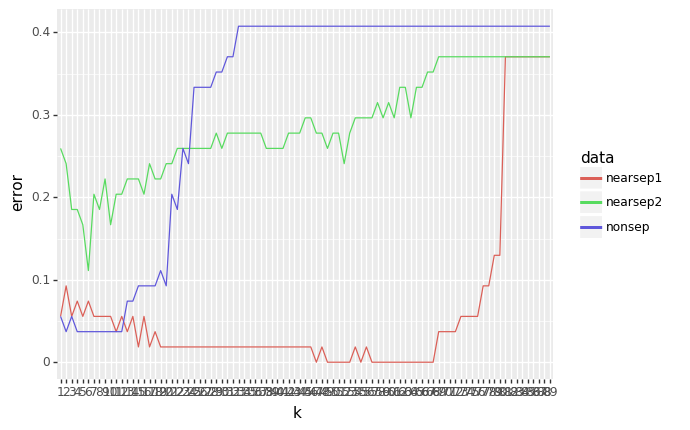

<ggplot: (-9223371915140055604)>

In [6]:
results = pd.DataFrame(columns = ['k', 'error', 'data'])
knn = GridSearchCV(
    KNeighborsClassifier(),
    param_grid = {"n_neighbors": np.arange(1,90)},
    scoring = 'accuracy', n_jobs= -1,
    cv = ShuffleSplit(n_splits = 1, train_size = 2/3)
)

for dt, df in data.items():
    knn.fit(df[['X1', 'X2']], df['Y'])
    results = results.append(pd.DataFrame({
        'k': np.arange(1,90),
        'error': 1 - knn.cv_results_['mean_test_score'],
        'data': dt
    }))

(
    ggplot(results) +
    aes("k","error", color = "data", group = "data") + 
    geom_line()
)

Estimer le risque moyen de l’algorithme des $k$ plus proches voisins par validation croisée 10-fold, puis par validation croisée Leave-One-Out pour $k$ = 1,..., 90

D:\Programmes\Anaconda3\envs\datascience\lib\site-packages\plotnine\utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


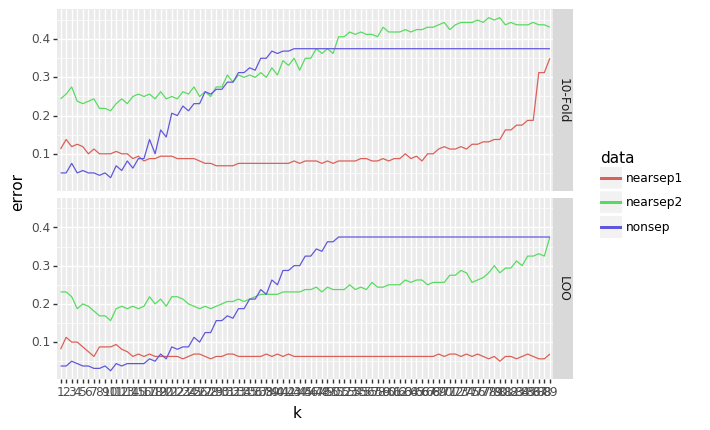

<ggplot: (-9223371915146489592)>

In [7]:
results = pd.DataFrame(columns = ['k', 'error', 'data', 'cv'])
fold = GridSearchCV(
    KNeighborsClassifier(),
    param_grid = {"n_neighbors": np.arange(1,90)},
    scoring = 'accuracy', n_jobs= -1,
    cv = KFold(n_splits = 10)
)
loo = GridSearchCV(
    KNeighborsClassifier(),
    param_grid = {"n_neighbors": np.arange(1,90)},
    scoring = 'accuracy', n_jobs= -1,
    cv = LeaveOneOut()
)

for dt, df in data.items():
    fold.fit(df[['X1', 'X2']], df['Y'])
    loo.fit(df[['X1', 'X2']], df['Y'])
    results = results.append(pd.DataFrame({
        'k': np.arange(1,90),
        'error': 1 - fold.cv_results_['mean_test_score'],
        'data': dt, 'cv': '10-Fold'
    }))
    results = results.append(pd.DataFrame({
        'k': np.arange(1,90),
        'error': 1 - loo.cv_results_['mean_test_score'],
        'data': dt, 'cv': 'LOO'
    }))

(
    ggplot(results) +
    aes("k","error", color = "data", group = "data") + 
    geom_line() + facet_grid("cv~.")
)